<a href="https://colab.research.google.com/github/JohannaVaittinen/Projekti/blob/main/K%C3%A4ytt%C3%B6ty%C3%B6kirja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kumpaa sukupuolta nimi edustaa**
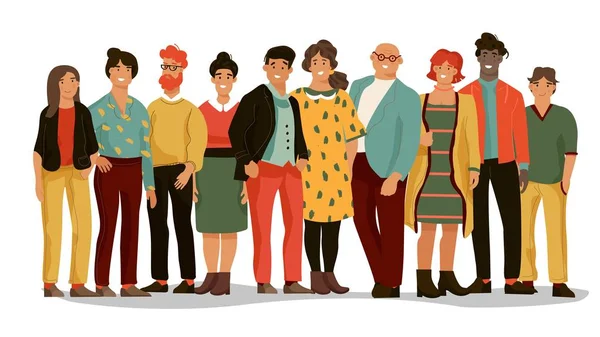

# **Käynnistä ohjelma Ctrl + F9**

In [1]:
#@title
# Tuodaan load_model metodi kerasin kirjastosta
# Tarvitemme myös Pandasin ja numpyn mallin käyttöön. 
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ladataan tallennettu ja opetettu malli
pred_model = load_model('/content/kumpisukupuoli.h5') 



In [2]:
#@title
def preprocess(nimet_df, train=True):
    # Kirjainten käsittely, kaikki kirjaimet pieneksi
    nimet_df['Etunimi'] = nimet_df['Etunimi'].str.lower()

    # Merkkijono erotellaan kirjainlistaksi
    nimet_df['Etunimi'] = [list(name) for name in nimet_df['Etunimi']]

    # Muunnetaan kaikki nimet saman mittaiseksi, mitta on 50 merkkiä (täytetään tyhjällä)
    nimi_pituus = 50
    nimet_df['Etunimi'] = [(nimi + [' ']*nimi_pituus)[:nimi_pituus] 
        for nimi in nimet_df['Etunimi']]

    # Muutetaan kirjaimet numeroiksi, jotta neuroverkko voi käsitellän niitä
    # Pythonin metodi ord() kääntää kirjaimet numeroiksi
    nimet_df['Etunimi'] = [[max(0.0, ord(char)-96.0) for char in nimi]
        for nimi in nimet_df['Etunimi']]
    
    if train:
        # Muunnetaan sukupuoli numeroksi (nainen = 0.0, mies = 1.0)
        nimet_df['Sukupuoli'] = [0.0 if sukupuoli == 'nainen' else 1.0 for sukupuoli in nimet_df['Sukupuoli']]
    
    return nimet_df


In [3]:
#@title
nimet = []
kysy = input('Kirjoita testattavat nimet, voit kirjoittaa niin monta nimeä kuin haluat.\nErottele nimet toisistaan pilkulla: ')
kysy = kysy.replace(' ','')
nimet = kysy.split(',')


Kirjoita testattavat nimet, voit kirjoittaa niin monta nimeä kuin haluat.
Erottele nimet toisistaan pilkulla: Anna, Veera, Timo, Petteri


In [15]:
#@title

# Muunnetaan nimet Pandas taulukoksi
pred_df = pd.DataFrame({'Etunimi': nimet})
# Esikäsitellään nimet samalla tavalla kuin opetusaineiston nimet esikäsiteltiin (valmis funktio  tähän)
pred_df = preprocess(pred_df, train=False)
# Ennustetaan mallilla 
result = pred_model.predict(np.asarray(
    pred_df['Etunimi'].values.tolist())).squeeze(axis=1)

# Määritetään, että mies, mikäli logit on yli 0.5
pred_df['Naisen vai miehen?'] = [
    'Mies' if logit > 0.5 else 'Nainen' for logit in result
]
# Tulostetaan todennäköisyys
pred_df['Todennäköisyys'] = [
    logit if logit > 0.5 else 1.0 - logit for logit in result]

# Tulostuksen määrittelyjä
pred_df['Etunimi'] = nimet
pred_df.rename(columns={'name': 'Name'}, inplace=True)
pred_df['Todennäköisyys'] = (pred_df['Todennäköisyys'].round(3))*100
pred_df.drop_duplicates(inplace=True)

pred_df

1/1 [==============================] - 0s 64ms/step


,Etunimi,Naisen vai miehen?,Todennäköisyys
0,Anna,Nainen,99.2
1,Veera,Nainen,85.0
2,Timo,Mies,95.8
3,Petteri,Mies,89.5
